# Section 3: Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis), here are some examples:
* How much will this house sell for?
* How many people eill bui this app?
* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

As you can see, the trend is **how much or many something**, to simplyfi it a regression problem is basically **predicting a number** of some sort, maybe coordinates, prices, etc.

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## Import Section

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)

2.10.1


## Introduction

### What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:

* **Architecture of a regression model**
* **Input shapes and output shapes**
  * X: features/data (inputs)
  * y: labels (outputs)
* **Creating custom data to view and fit**
* **Steps in modelling**
  * Creating a model
  * Compiling a model
    * *Defining a loss function*
    * *Setting up an optimizer*
    * *Creating evaluation metrics*
  * Fitting a model (getting it to find patterns in our data)
* **Evaluating a model**
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)
* **Saving a model** (so we can use it later)
* **Loading a model**

Don't worry if none of these make sense now, we're going to go through each.

### Inputs and Outputs of a Neural Network Regression Model

For this example let's say we have a house for sale and we want to build a model to predict how much I should offer if we go to auction:

What do we know:
* Independent Variables or Features:
  * Number of Bathrooms (x4)
  * Number of Bedrooms (x2)
  * Number of Garages (x2)
* Dependant or Target Variables:
  * We now the prices of other houses nearby

**Inputs:** We have to encode the Features to pass them to the model. It can be as many Features as we want, therefore the shape won't necessarily be fixed.
`features = [f1, f2, f3, f4, f5, f6, f7, ..., fn]`

**ML Algorithms:** Often someone already did a model to fix your problem, if not, you can build one

**Outputs:** Based on the Features and the targets from other records, the model gives us the predicted output. Normally in regression models the shape of the output is fixed to 1.
`output = [123456]`

### Typical architecture of a regresison neural network

#### Graphical Representation - Simple Example and Explanation

![Neural Network Architecture](../assets/nn_representation.png)

| Layer(s) | Description                                                | Units/Neurons in the example image |
| -------- | ---------------------------------------------------------- | :--------------------------------: |
| Input    | Where the data goes in                                     | 3
| Hidden   | Learns patterns in data                                    | 4
| Output   | Outputs learned representation or prediction probabilities | 1

#### Complete Explanation

**There are many different ways (actually, there's almost an infinite number of ways) to write neural networks, but the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.**


| Hyperparameters          | Typical Value |
| ------------------------ | ------------- |
| Input layer shape        | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s)	       | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape	   | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation	       | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation	       | None, ReLU, logistic/tanh |
| Loss function	           | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer                | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

*Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

## Video Activities 

### 42. Creating Sample Regression Data (so we can model it)

* [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

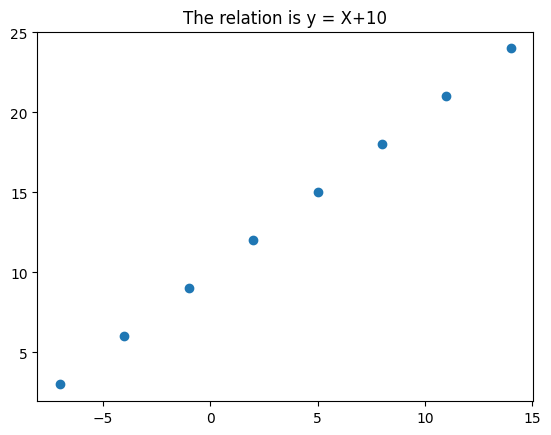

In [3]:
# Creating features
X = np.array(
    [-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]
)

# Create labels
y = np.array(
    [3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]
)

# Visualize it
plt.scatter(X,y)
plt.title('The relation is y = X+10')
plt.show()

In [4]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
## Input and Output Shapes - Create a demo tensor for our housing price prediction problem
house_info = tf.constant(
    ['bedroom', 'bathroom', 'garage']
)

house_price = tf.constant(
    [939700]
)

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [6]:
# In the following case we have 1 input feature to predict 1 output feature, 
# therfore we have shape 0 since the input and output are scalars, either way
# we still have 1 input for 1 output
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

### 44. The mayor steps in modeling with TensorFlow

In [7]:
# NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape


(TensorShape([]), TensorShape([]))

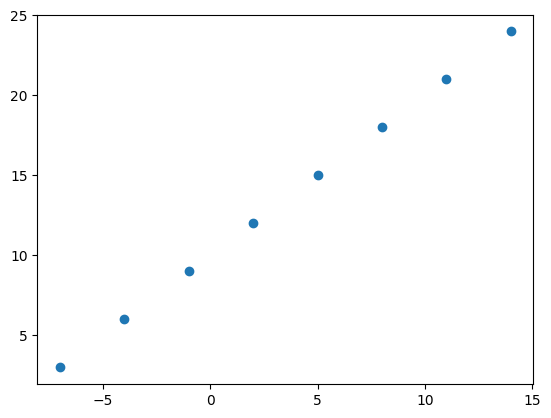

In [9]:
plt.scatter(X, y)

#### **Steps in modelling with TensorFlow**

**Note:**

**Dense Layers** are fully connected layers which means that each unit/neuron in the Dense layer connect to all the unit/neurons in the next layer

1. **Create model**
   1. Defines for the Deep Learning Model:
      1. *Input Layer(s)*
      2. *Hidden Layer(s)*
      3. *Output Layer(s)*

2. **Compiling a model**
   1. Defines:
      1. *Loss function*
      2. *Optimizer to improve the patterns*
      3. *Evaluation metrics*
3. **Fitting the model**
   1. Letting the model try to find patterns between X and y (Features and Labels)
   2. Defines:
      1. *Epochs* (How many times the model will go through all of the training samples)
4. Evaluate the model on the test data

**Note:** 

You might see this error

```
ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None
```
This happens because `model.fit()` no longer automatically upscales inputs from shape `(batch_size, )` to `(batch_size, 1)`.

This results in a shape error (remember one of most common errors in deep learning is input and output shapes).

**You can add an extra dimension to your input data by using:** 
* `tf.expand_dims(input_data, axis = -1)`

**The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).**


In [10]:
# Random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae, # Mean Absolute Error loss = mean(abs(y_true - y_pred), axis = 1)
    optimizer = tf.keras.optimizers.SGD(), # Stochastic gradient descent
    metrics = ['mae'] 
)

# Fit the model 
model.fit(
    tf.expand_dims(X, axis= -1),
    y,
    epochs=5
)

Epoch 1/5


1/1 [==============================] - 1s 688ms/step - loss: 19.7584 - mae: 19.7584
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 19.4771 - mae: 19.4771
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 19.1959 - mae: 19.1959
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 18.9146 - mae: 18.9146
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 18.6334 - mae: 18.6334


In [11]:
# Let's check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 77ms/step


array([[-18.193813]], dtype=float32)

In [13]:
model.predict([-4.])

1/1 [==============================] - 0s 33ms/step


array([[4.327221]], dtype=float32)

In [14]:
y_pred + 8.9057

array([[-9.288114]], dtype=float32)

### 45 - 47. Improving a Model

#### 45. Steps in improving a model with TensorFlow - Part 1

We can improve our model by altering the steps we took to create a model

1. **Creating a Model:** We might add layers, increase the hidden units within the hidden layers, change the activation function of each layer
2. **Compiling a Model:** Here we might change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a Model:** Here we might fit a model for more **epochs** (leave it training longer) or on more data (give the model more examples to learn from)

In [15]:
# 1. Creating a Model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the Model - Optimization Function and Learning Rate
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # Stochastic gradient descent
    metrics = ['mae']
)

# 3. Fit the Model - More Epochs and Data
model.fit(
    tf.expand_dims(
        X, 
        axis = -1
    ), 
    y, 
    epochs=100
) # Originally only 5 epochs

Epoch 1/100


1/1 [==============================] - 0s 203ms/step - loss: 21.1307 - mae: 21.1307
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 20.7376 - mae: 20.7376
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 20.3860 - mae: 20.3860
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 20.1048 - mae: 20.1048
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 19.8235 - mae: 19.8235
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 19.5423 - mae: 19.5423
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 19.2610 - mae: 19.2610
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 18.9798 - mae: 18.9798
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 18.6985 - mae: 18.6985
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 18.4173 - mae: 18.4173
Epoch 11/100
1/1 [==============================] - 0s 4ms/step -

In [16]:
print(X)
print(y)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)


In [17]:
y_pred = model.predict(
    [17.0]
)
y_pred

1/1 [==============================] - 0s 54ms/step


array([[29.391958]], dtype=float32)

#### 46. Steps in improving a model with TensorFlow - Part 2

In [18]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, activation = "relu"),
        tf.keras.layers.Dense(100, activation = "relu"),
        tf.keras.layers.Dense(100, activation = "relu"),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model.fit(
    tf.expand_dims(X, axis = -1),
    y,
    epochs = 100
)

Epoch 1/100


1/1 [==============================] - 0s 273ms/step - loss: 13.8842 - mae: 13.8842
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.3591 - mae: 13.3591
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.8307 - mae: 12.8307
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2952 - mae: 12.2952
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7186 - mae: 11.7186
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0637 - mae: 11.0637
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2628 - mae: 10.2628
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.2806 - mae: 9.2806
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0289 - mae: 8.0289
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 6.4360 - mae: 6.4360
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss:

In [19]:
print(X)
print(y)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)


In [20]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 68ms/step


array([[30.285944]], dtype=float32)

#### 47. Steps in improving a model with TensorFlow - Part 3

In [21]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(1),
    ]
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ['mae']
)

model.fit(
    tf.expand_dims(
        X, 
        axis = -1
    ),
    y,
    epochs = 100
)

Epoch 1/100


c:\Users\diego\miniconda3\envs\tf-dev-cert\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 365ms/step - loss: 13.1453 - mae: 13.1453
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9864 - mae: 11.9864
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.1691 - mae: 11.1691
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1301 - mae: 10.1301
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7187 - mae: 8.7187
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 6.8842 - mae: 6.8842
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 4.5537 - mae: 4.5537
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 4.3292 - mae: 4.3292
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 5.3532 - mae: 5.3532
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 5.7362 - mae: 5.7362
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 

In [22]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 68ms/step


array([[26.513231]], dtype=float32)

### 48 - 55. Evaluating a TensorFlow Model

In practice, a typical workflow we'll have to go through when building neural networks is:

```
Build mode -> Fit -> Evaluate -> tweak model -> Build mode -> Fit -> Evaluate -> tweak model -> Build mode -> Fit -> Evaluate -> tweak model -> ...
```

#### 48. "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* **Data** - What data are we working with? What does it look like?
* **Model** - What does our model look like?
* **Training of a Model** - How does a model perform while it learns?
* **Predictions** - How do the predictions of a model line up against the groudn truth (original labels)?

In [4]:
# Make bigger dataset
X = tf.range(-100, 100, 4)
y = (X + 10)

X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

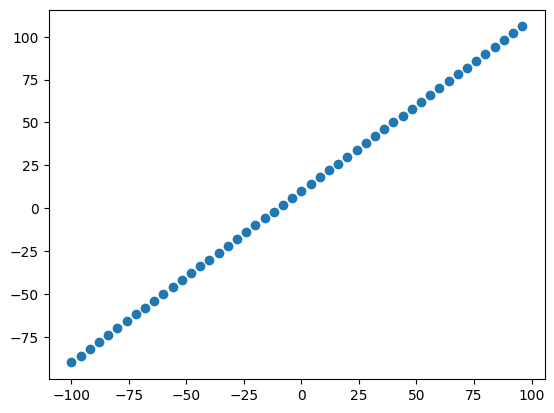

In [24]:
# Visualize the data
plt.scatter(X, y)

#### 49. The Three Datasets

In [5]:
# Training | Validation(?) | Test
X_train, X_test, y_train, y_test = train_test_split(
    X.numpy(), 
    y.numpy(),
    test_size = 0.2,
    random_state = 42
)

X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

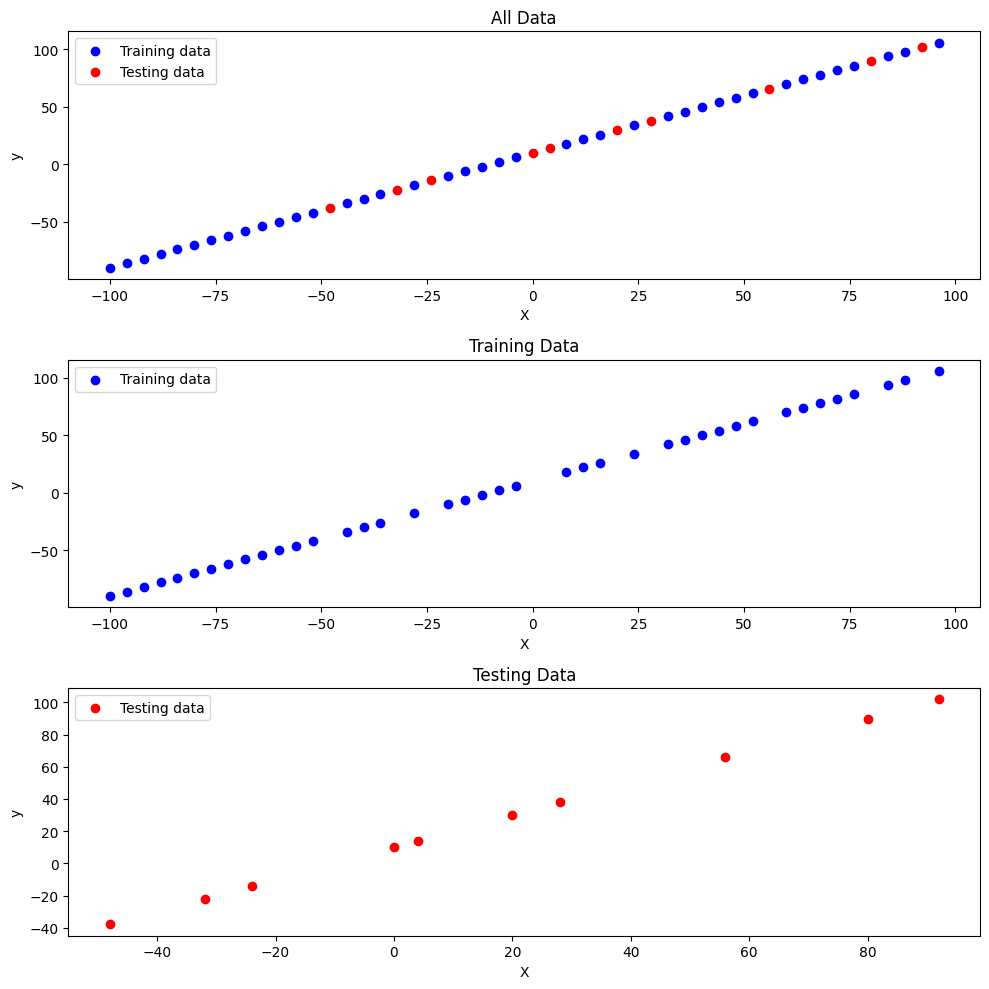

In [26]:
# Visualize splitted data
fig, axes = plt.subplots(
    figsize = (10, 10),
    nrows=3,
    ncols  = 1
)

# Plot training data
axes[0].scatter(X_train, y_train, color='blue', label='Training data')
axes[0].scatter(X_test, y_test, color='red', label='Testing data')
axes[0].set_title('All Data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].legend()

# Plot training data
axes[1].scatter(X_train, y_train, color='blue', label='Training data')
axes[1].set_title('Training Data')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].legend()

# Plot testing data
axes[2].scatter(X_test, y_test, color='red', label='Testing data')
axes[2].set_title('Testing Data')
axes[2].set_xlabel('X')
axes[2].set_ylabel('y')
axes[2].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### 50. Getting a model summary

In [27]:
# Let's build a neural network for our new data

# Create model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# Compile Model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# Fit Model
# model.fit(
#     tf.expand_dims(X_train, axis = -1), 
#     y_train, 
#     epochs = 100
# )

In [28]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# Create a model that builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, input_shape = [1])
    ]
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


| Param Type    | Description          |
| :-----------: | -------------------- |
| Total         | Total numbers of parameters in the model (How many diff patterns our model is going to try to learn within the relationship between X and y data) |
| Trainable     | These are the params (patterns) the model can update as it trains |
| Non-trainable | Non-trainable params - Aren't updated during training (Typically when you bring in already learn patterns or param from other models during **Transfer Learning**) |


| Resources   |
| :---------: |
| [What are primary trainable parameters of a neural network?](https://medium.com/@kavita_gupta/what-are-primary-trainable-parameters-of-a-neural-network-6b99f887957c#:~:text=Trainable%20parameters%20means%20the%20parameters,impact%20network's%20accuracy%20and%20performance.) |
| [Weights and Bias](https://medium.com/fintechexplained/neural-networks-bias-and-weights-10b53e6285da) |
| [What's a non-trainable parameter?](https://www.baeldung.com/cs/non-trainable-parameter) |

##### **50. Exercise**

In [29]:
# Play around with the number of hidden units/neurons in the dense layer, see how that affects the number of parameters (total and trainable) by calling `model.summary()`
summaries = []
for i in range(10):
    print(f"{i} units/neurons")
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(i, input_shape=[1])
        ]
    )

    model.compile(
        loss = tf.keras.losses.mae,
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ['mae']
    )

    model.summary()

0 units/neurons
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 0)                 0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
1 units/neurons
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
2 units/neurons
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shap

4 units/neurons
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
5 units/neurons
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
6 units/neurons
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output 

Conclusion: Every time we add a unit to a single layer model, all inputs go to each unit, therefore this happens:

If 2 params:
* 1 unit - (params) * (units)
* 2 units - (params) * (units)
* 3 units - (params) * (units)
* ...
* N units - (params) * (units)

#### 51. Visualizing a Model's Layer

* [tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)

Using `plot_model()` from `tensorflow.keras.utils` will allow us to visualize the models we created using **TensorFlow**, to use this function we need to install `pydot` and `graphviz`, either adding them to the `requirements.txt`, using `pip install pydot graphviz` or using conda-cli to install the packages 

`pydot` is needed to run the `plot_model` and `pydot` needs `graphviz` to work properly

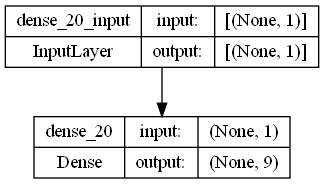

In [33]:
plot_model(model=model, show_shapes=True)

#### 52. Visualizing a Model's Predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs `y_pred` (fround truth versus your model's predictions)

In [50]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50, activation = 'relu'),
        tf.keras.layers.Dense(50, activation = 'relu'),
        tf.keras.layers.Dense(50, activation = 'relu'),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ['mae']
)

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose = 0)

c:\Users\diego\miniconda3\envs\tf-dev-cert\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [51]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 54ms/step


array([[-43.005993],
       [ 63.55314 ],
       [ 28.187595],
       [ 87.13017 ],
       [-25.447376],
       [ 98.91869 ],
       [ 12.47102 ],
       [  8.550303],
       [ 36.046608],
       [-16.636824]], dtype=float32)

In [52]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([-38,  66,  30,  90, -22, 102,  14,  10,  38, -14])>

In [11]:
def check_predictions(predictions, train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test):
    '''
    Plots training and test data and compares predictions to ground truth labels
    (train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_pred)
    '''
    
    plt.figure(figsize=(10,7))

    # Training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    # Test data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')
    # Predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    plt.legend()
    plt.tight_layout()
    plt.show()


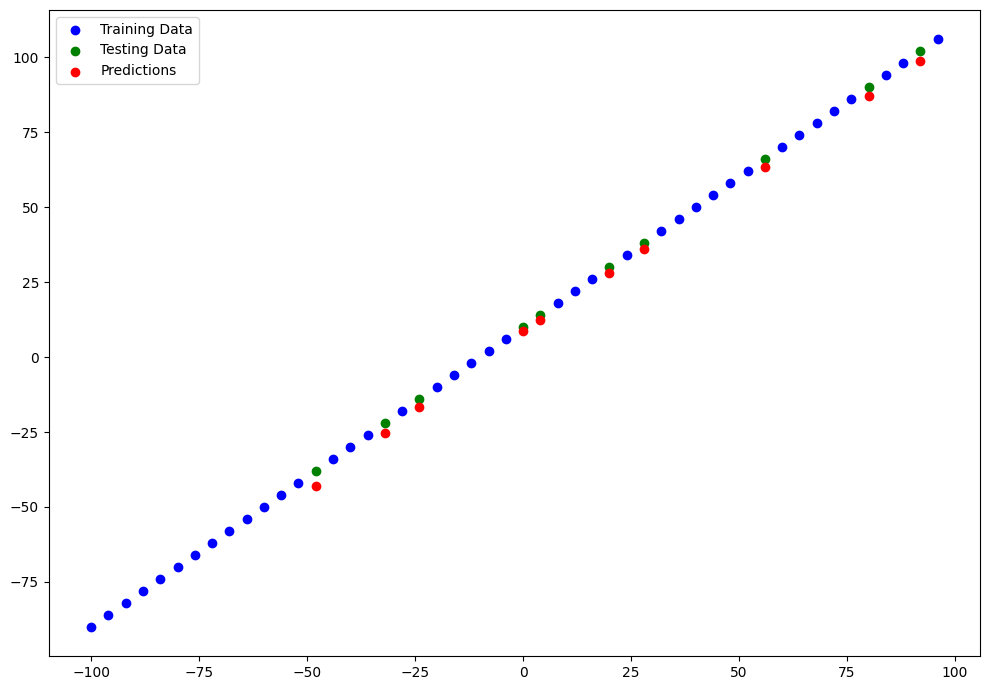

In [55]:
check_predictions(
    train_data = X_train, 
    train_labels = y_train, 
    test_data = X_test, 
    test_labels = y_test, 
    predictions = y_pred
)

#### 53. Common Regression Evaluation Metrics

Depending on the problem we work on there will be different evaluation metrics to evaluate your model's performance

| Metric Name         | TensorFlow Code                                               | When to Use                            |
| ------------------- | ------------------------------------------------------------- | -------------------------------------- |
| Mean Absolute Error | `tf.keras.losses.MAE()` or `tf.metrics.mean_absolute_error()` | Starter metric for regression problems |
| Mean Square Error   | `tf.keras.losses.MSE()` or `tf.metrics.mean_square_error()`   | When larger errors are more significant than smaller ones |
| [Huber](https://en.wikipedia.org/wiki/Huber_loss) | `tf.keras.losses.Huber()`                                     | Combination of MSE and MAE. Less sensitive to outliers than MSE. |

Since we're working on a regression, we have 2 main metrics:
* [MAE - Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)
  > On average, how wrong is each of my model's predictions

* [MSE - Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)
  > Square the average errors

In [56]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 133ms/step - loss: 2.6233 - mae: 2.6233


[2.6232659816741943, 2.6232659816741943]

In [59]:
y_pred, y_test

(array([[-43.005993],
        [ 63.55314 ],
        [ 28.187595],
        [ 87.13017 ],
        [-25.447376],
        [ 98.91869 ],
        [ 12.47102 ],
        [  8.550303],
        [ 36.046608],
        [-16.636824]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([-38,  66,  30,  90, -22, 102,  14,  10,  38, -14])>)

#### 54. Mean Absolute Error

In [65]:
tf.metrics.MAE(y_test, tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=2.623266>

In [19]:
def mae_metric(y_true, y_pred):
    return tf.metrics.MAE(y_test, tf.squeeze(tf.constant(y_pred)))

#### 55. Mean Square Error

In [66]:
tf.metrics.MSE(y_test, tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=7.915465>

In [18]:
def mse_metric(y_true, y_pred):
    return tf.metrics.MSE(y_test, tf.squeeze(tf.constant(y_pred)))

### 56 - 57. Setting up Modelling Experiments

The machine learning practicioner's motto would be:
> Experiment, experiment, experiment

**Options to improve our models:**
* *Get more data* - Get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
* *Make your model larger using a more complex model* - This might come in the form of more layers or more hidden units/neurons in each layer.
* *Train for Longer* - Give your model more of a chance to find patterns in the data

**Let's do 3 modelling experiments:**
1. `model_1`
    * 1 Layer
    * 100 epochs
2. `model_2` 
    * 2 layers
    * 100 epochs
3. `model_3`
   * 2 layers
   * 500 epochs
4. `model_4`
   * 2 layers
   * 100 epochs
   * Adam Optimizer
5. `model_5`
   * 4 layers [(50, 'relu'), (50, 'relu'), (50, 'relu'), 1]
   * 100 epochs

You want to start with small experiments (small models )and make sure they work, then increase their scale if needed

In [6]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([ -52,  -84,   48,  -68,  -88,  -76,   64,   84,   88,  -40,  -64,
         -36,   -4,   36,   24, -100,   76,    8,   32,  -80,   16,  -56,
          44,  -96,  -16,  -92,   72,   40,   -8,   60,  -60,  -12,  -28,
          96,  -20,  -72,   68,  -44,   12,   52])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-42, -74,  58, -58, -78, -66,  74,  94,  98, -30, -54, -26,   6,
         46,  34, -90,  86,  18,  42, -70,  26, -46,  54, -86,  -6, -82,
         82,  50,   2,  70, -50,  -2, -18, 106, -10, -62,  78, -34,  22,
         62])>)

In [35]:
tf.random.set_seed(42)

models = {
    'model_1': tf.keras.Sequential(
        [
            tf.keras.layers.Dense(1)
        ]
    ),
    'model_2': tf.keras.Sequential(
        [
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
        ]
    ),
    'model_3': tf.keras.Sequential(
        [
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
        ]
    ),
    'model_4': tf.keras.Sequential(
        [
            tf.keras.layers.Dense(50),
            tf.keras.layers.Dense(1)
        ]
    ),
    'model_5': tf.keras.Sequential(
        [
            tf.keras.layers.Dense(50, activation = 'relu'),
            tf.keras.layers.Dense(50, activation = 'relu'),
            tf.keras.layers.Dense(50, activation = 'relu'),
            tf.keras.layers.Dense(1)
        ]
    ),
}

#### 56. Start with a Simple Model

##### **Model_1**

1/1 [==============================] - 0s 36ms/step


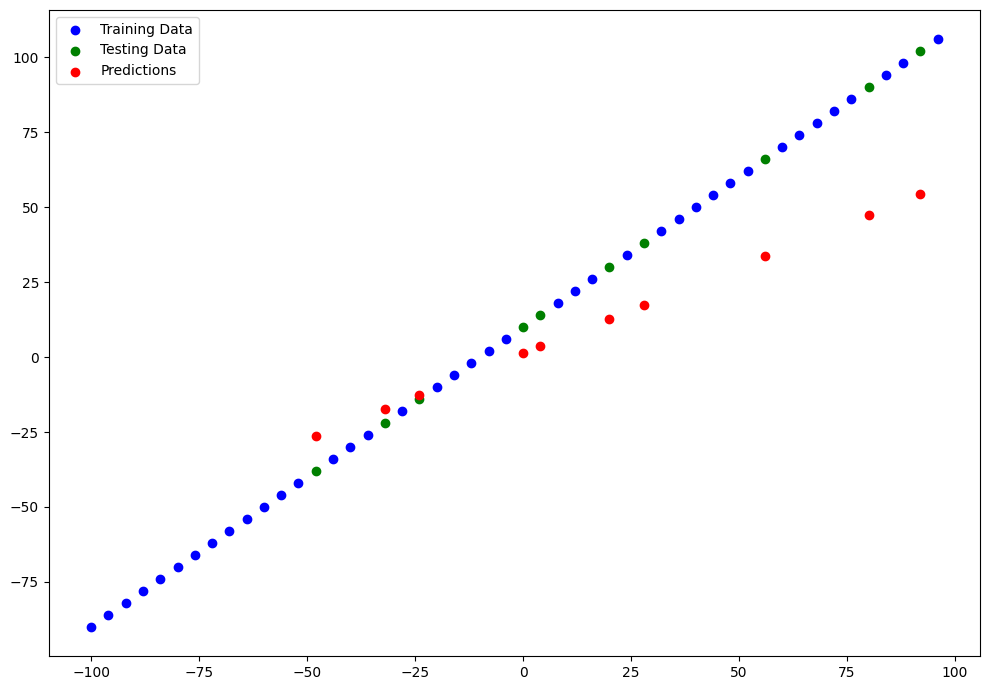

In [27]:
models['model_1'].compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

models['model_1'].fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs=100,
    verbose = 0
)

y_pred_1 = models['model_1'].predict(X_test)

check_predictions(predictions = y_pred_1)

In [28]:
mae_1 = mae_metric(y_test, y_pred_1)
mse_1 = mse_metric(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=19.73668>,
 <tf.Tensor: shape=(), dtype=float32, numpy=619.59045>)

#### 57. Increasing Complexity

##### **Model_2**

1/1 [==============================] - 0s 49ms/step


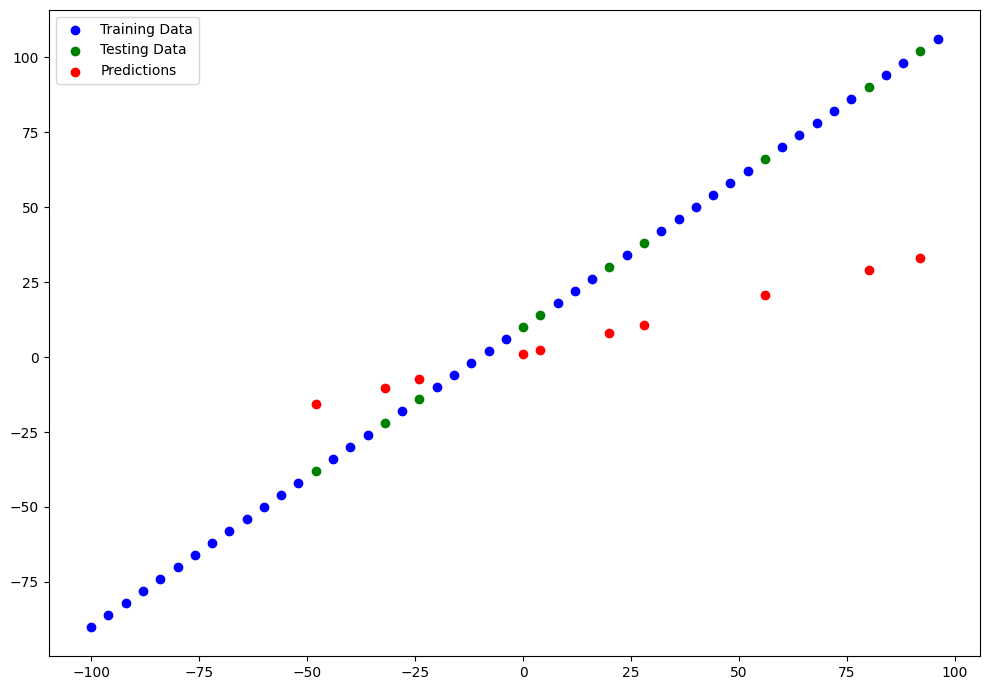

In [29]:
models['model_2'].compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

models['model_2'].fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs=100,
    verbose = 0
)

y_pred_2 = models['model_2'].predict(X_test)

check_predictions(predictions = y_pred_2)

In [30]:
mae_2 = mae_metric(y_test, y_pred_2)
mse_2 = mse_metric(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=28.561665>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1263.1437>)

##### **Model_3**

1/1 [==============================] - 0s 40ms/step


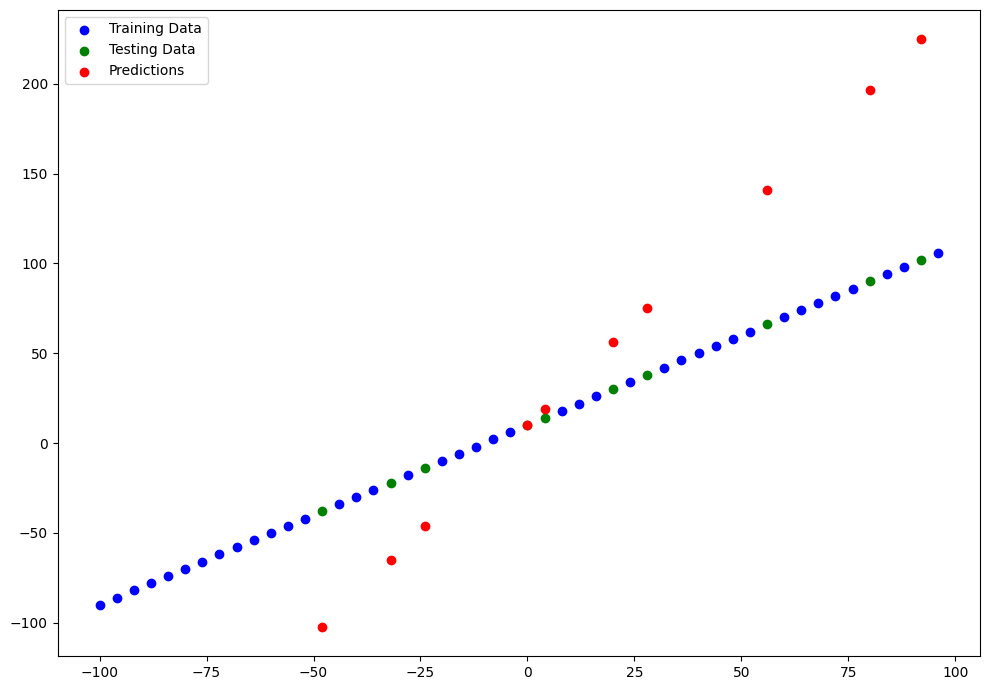

In [33]:
models['model_3'].compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

models['model_3'].fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs=500,
    verbose = 0
)

y_pred_3 = models['model_3'].predict(X_test)

check_predictions(predictions = y_pred_3)

In [32]:
mae_3 = mae_metric(y_test, y_pred_3)
mse_3 = mse_metric(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=40.044235>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2481.85>)

##### **Model_4**

1/1 [==============================] - 0s 42ms/step


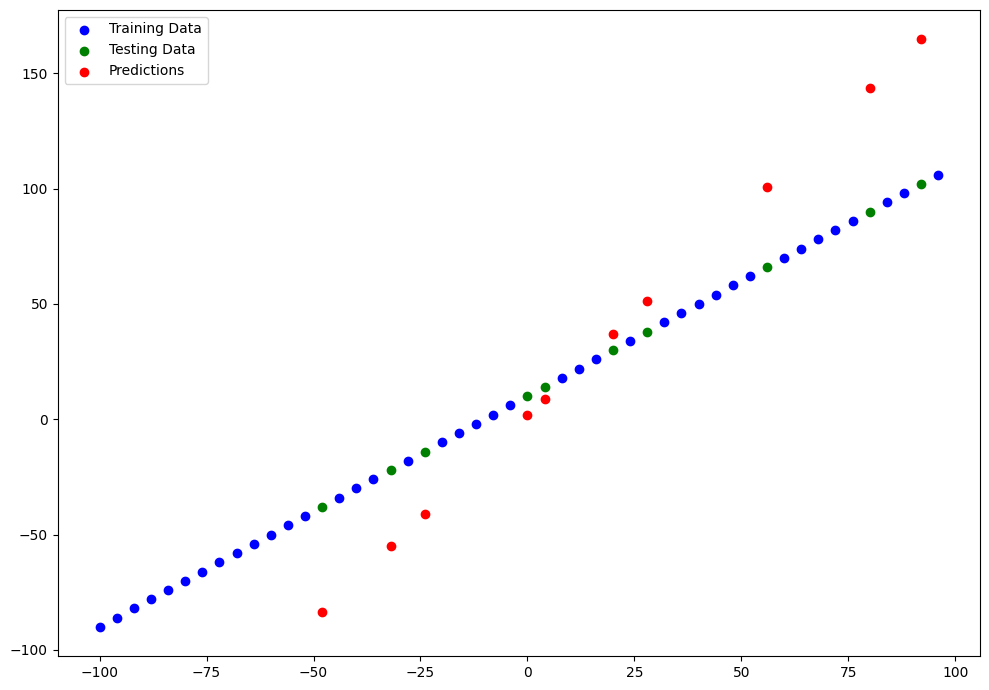

In [36]:
models['model_4'].compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

models['model_4'].fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs=100,
    verbose = 0
)

y_pred_4 = models['model_4'].predict(X_test)

mae_4 = mae_metric(y_test, y_pred_4)
mse_4 = mse_metric(y_test, y_pred_4)

check_predictions(predictions = y_pred_4)

##### **Model_5**

1/1 [==============================] - 0s 56ms/step


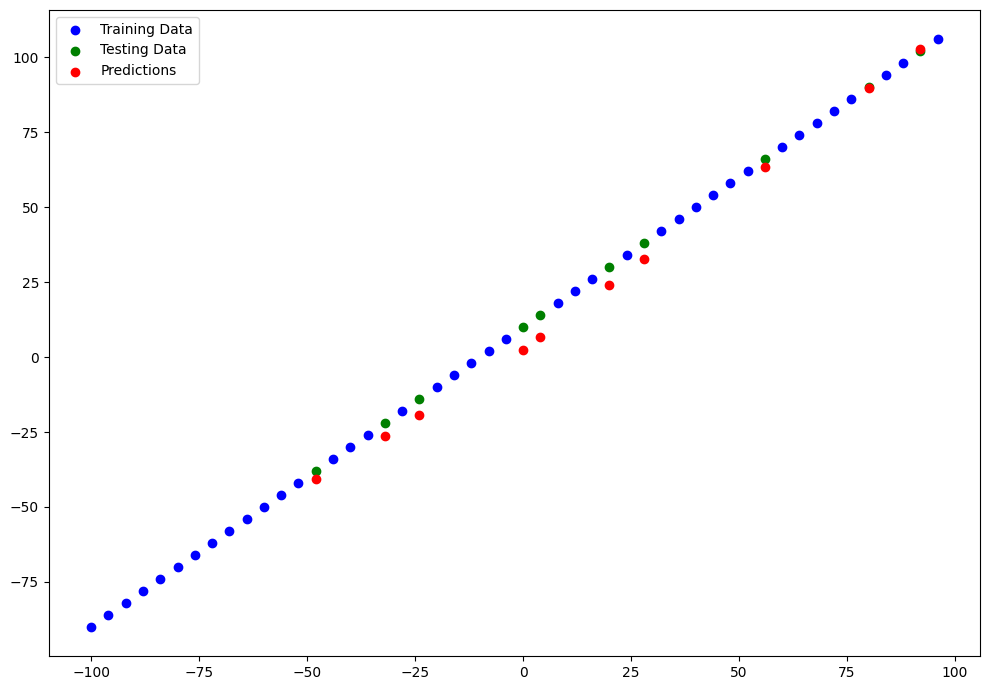

In [38]:
models['model_5'].compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

models['model_5'].fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs=100,
    verbose = 0
)

y_pred_5 = models['model_5'].predict(X_test)

mae_5 = mae_metric(y_test, y_pred_5)
mse_5 = mse_metric(y_test, y_pred_5)

check_predictions(predictions = y_pred_5)

### 58. Comparing and tracking your TensorFlow modelling experiments

### 59. How to save a TensorFlow model

### 60. How to load and use a saved TensorFlow model

### 62 - 64. Putting together what we've learned

#### 62. Preparing a Dataset

#### 63. Building a Regression Model

#### 64. Improving our Regression Model

### 65 - 67. Preprocessing data with Feature Scaling

#### 65. What is Feature Scaling?

#### 66. Normalizing our Data

#### 67. Fitting a Model on Scaled Data